<a href="https://colab.research.google.com/github/hariszaf/metabolic_toy_model/blob/main/Antony2025/DNNGIORtraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Use DNNGIOR On Your Own Training Set**

Installing Tensorflow

In [ ]:
# !pip install tensorflow==2.12

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!pip install cobra==0.29
!pip install dnngior --no-deps
!pip install gurobipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 89.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dnngior 0.0.5 requires cobra<=0.23.0, but you have cobra 0.29.0 which is incompatible.
dnngior 0.0.5 requires gurobipy<11.0.0,>=10.0.1, but you have gurobipy 12.0.1 which is incompatible.


Load dependecies

In [9]:
import numpy as np
import pandas as pd
import os
import sys
from pathlib import Path
from dnngior import NN_Trainer
from dnngior import NN_Predictor
from dnngior import Gapfill
from dnngior.reaction_class import Reaction as rc
import tensorflow as tf

from cobra.io import read_sbml_model


The rest of dnngior features can be used without it.


### Generating reaction presence dataframe

The DNNGIOR neural network is trained on one-per-species draft models, learning the coocurences of reactions encoded by the genomes. If we want to  prepare our own training data we need to take a set of draft models and determine the reactions present. This means that we need to generate a binary array encoding which models have which reactions. We need a list of all possible reactions found in your training data, which will serve as the reaction keys, and the rows in our dataset. There are actually a lot of ways to do this, this is just what I did. As loading the models take relatively long, we will also keep track of the reactions in model_reaction_dic.

Example:

```
model_reaction_dic = {}
rxn = []
for file_path, model_id in zip(paths,model_ids):
    print(model_id)
    model = rc(model = os.path.join(model_path, file_path))
    rs = set(model.reactions)
    model_reaction_dic[model_id]=rs
    
    #generate a list of all possible reactions
    for i in list(rs):
         if i not in rxn and not i.startswith('EX_'):
             rxn.append(i)
```

 We can then determine for every draft training models which of these reactions are present and create a binary list of reactions presences. We will end up with a binary array with as rows the different reactions and as columns all models in the training dataset.

 ```
reaction_df=pd.DataFrame(index=rxn, columns=model_ids)

for key, value in model_reaction_dic.items():
    a = []
    for i in rxn:
        if i in value:
            a.append(1)
        else:
            a.append(0)
    reaction_df[key]=a

 ```

For this tutorial, we will use the reaction class from dnngior but you can use any module to load metabolic models or extract the reaction sets in another way, the key is to end up with a binary array of reaction presences.

In [14]:
#path to training models

model_path =  '/content/drive/MyDrive/Antony/one_per_phylum_models'

#output path training data

output_path = 'One_per_phylum_training_data.csv'

#list of model-ids of draft-models
paths  = os.listdir(model_path)
model_ids = []
for filename in paths:
    model_ids.append(filename[:-5])

model_reaction_dic = {}
rxn = []
for file_path, model_id in zip(paths,model_ids):
    print(model_id)
    model = rc(model = os.path.join(model_path, file_path))
    rs = set(model.reactions)
    model_reaction_dic[model_id]=rs

    #generate a list of all possible reactions
    for i in list(rs):
         if i not in rxn and i.startswith('rxn_'):
             rxn.append(i)

n_reactions = len(rxn)

reaction_df=pd.DataFrame(index=rxn, columns=model_ids)
for key, value in model_reaction_dic.items():
    a = []
    for i in rxn:
        if i in value:
            a.append(1)
        else:
            a.append(0)
    reaction_df[key]=a

#saving to pandas file
reaction_df.to_csv(output_path)


Candidatus Cloacimonadota


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Candidatus Rokuibacteriota


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Nitrososphaerota
Candidatus Magasanikiibacteriota


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Candidatus Diapherotrites


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Candidatus Uhrbacteria


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Candidatus Odinarchaeota


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Candidatus Hadarchaeota


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Thermomicrobiota
Lentisphaerota
Candidatus Micrarchaeota


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Candidatus Komeiliibacteriota


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Candidatus Terryibacteriota


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Candidatus Heimdallarchaeota


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Candidatus Hinthialibacterota


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Candidatus Rifleibacteriota


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Candidatus Peregrinibacteria


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Candidatus Bathyarchaeota


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Candidatus Yanofskyibacteriota


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Candidatus Neomarinimicrobiota


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Euryarchaeota
Candidatus Aenigmatarchaeota


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Candidatus Altarchaeota


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Candidatus Methanomethylicota


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Candidatus Kerfeldiibacteriota


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Atribacterota
Candidatus Thorarchaeota


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Candidatus Buchananiibacteriota


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Nanoarchaeota
Candidatus Woesearchaeota


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Candidatus Saccharibacteria


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Campylobacterota
Candidatus Parvarchaeota


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Nitrospirota
Fusobacteriota


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Candidatus Margulisiibacteriota
Elusimicrobiota
Coprothermobacterota
Kiritimatiellota
Gemmatimonadota
Spirochaetota
Candidatus Lindowiibacteriota


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Fibrobacterota
Abditibacteriota
Balneolota
Actinomycetota
Candidatus Schekmaniibacteriota


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Candidatus Methylomirabilota


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Vulcanimicrobiota
Chlamydiota
Candidatus Dormiibacterota


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Candidatus Eiseniibacteriota


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Candidatus Omnitrophota


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Candidatus Walliibacteriota


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Calditrichota
Dictyoglomota
Pseudomonadota
Candidatus Aminicenantota


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Candidatus Latescibacterota


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Candidatus Firestoneibacteriota


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Deferribacterota
Candidatus Kryptoniota


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Bacillota
Candidatus Bipolaricaulota


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Chrysiogenota
Candidatus Sumerlaeota


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Candidatus Delongiibacteriota


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Candidatus Tectimicrobiota


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Candidatus Goldiibacteriota


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Bacteroidota
Rhodothermota
Candidatus Thermoplasmatota


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Cyanobacteriota
Thermodesulfobacteriota
Planctomycetota


In [ ]:
reaction_df.columns[reaction_df.sum() < 200]

NameError: name 'reaction_df' is not defined

<Axes: ylabel='Frequency'>

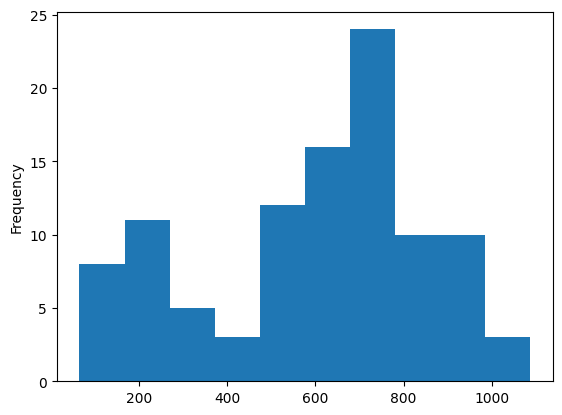

NameError: name 'reaction_df' is not defined

In [ ]:
reaction_df.sum().plot.hist()

### Training the Neural Network

Now that we have prepared the training data, we can start training the network. The easiest way to train the network requires providing a pandas dataframe where the index are the reaction keys and the columns the different training examples (see above). You could also provide a numpy array and the reaction keys as a separate list, but as we just created a dataframe we dont have to dot that. The function will return a NN_predictor object to be used immediately, but it will also save it at output_path.


NOTE: `with tf.device("/cpu:0"):` forces tensorflow to use you cpu to train, this can actually be faster if your GPU is not great or tensorflow is not setup properly, and the training is really fast anyway.

In [ ]:
#Load in a our training sample
training_data_path = 'One_per_phylum_training_data.csv'
training_data = pd.read_csv(training_data_path, index_col=0)

#set save path
save_path = 'NN_phylum.npz'

#Train the network
with tf.device("/cpu:0"):
    NN_example = NN_Trainer.train(data=training_data, modeltype='ModelSEED',output_path=save_path)

Num GPUs Available:  1
# WARNING: overwriting savefile
using data as labels
dataset created
training on data with shape: (3060, 2002) with 1493016.0 reactions
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               512768    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 2002)              514514    
                                                                 
Total params: 1,027,282
Trainable params: 1,027,282
Non-trainable params: 0
_________________________________________________________________
Train on 3060 samples


2025-02-28 17:14:33.191844: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-28 17:14:33.289937: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 212 MB memory:  -> device: 0, name: Quadro K620, pci bus id: 0000:03:00.0, compute capability: 5.0
2025-02-28 17:14:33.306043: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2025-02-28 17:14:33.337534: W tensorflow/c/c_api.cc:291] Operation '{name:'false_negatives_1/Assign' id:111 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node false_negatives_1/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, 

Epoch 1/10
3060/3060 [==============================] - 1s 192us/sample - loss: 0.0535 - auc: 0.9274 - precision: 0.8837 - recall: 0.5968
Epoch 2/10
3060/3060 [==============================] - 0s 139us/sample - loss: 0.0263 - auc: 0.9786 - precision: 0.9634 - recall: 0.7837
Epoch 3/10
3060/3060 [==============================] - 0s 132us/sample - loss: 0.0159 - auc: 0.9899 - precision: 0.9824 - recall: 0.8669
Epoch 4/10
3060/3060 [==============================] - 0s 131us/sample - loss: 0.0113 - auc: 0.9937 - precision: 0.9884 - recall: 0.9039
Epoch 5/10
3060/3060 [==============================] - 0s 131us/sample - loss: 0.0089 - auc: 0.9954 - precision: 0.9902 - recall: 0.9249
Epoch 6/10
3060/3060 [==============================] - 0s 133us/sample - loss: 0.0072 - auc: 0.9964 - precision: 0.9922 - recall: 0.9377
Epoch 7/10
3060/3060 [==============================] - 0s 129us/sample - loss: 0.0063 - auc: 0.9969 - precision: 0.9929 - recall: 0.9458
Epoch 8/10
3060/3060 [============

The function will return a object of the predictor class (NN_predictor) containing the network, the reaction keys and modeltype. By default the network in this object is not a full tensorflow object but rather an array of the weights and biases of the different layers. It can still be used to make predictions while being less memory intensive by using matrix multiplication:

        a = input
        for layer in self.network:
            a = a.clip(0)
            a = ((a @ layer[0]) + layer[1])
        prediction =  1 / (1 + np.exp(-a))#sigmoid(a)
        
Which is build into the NN_Predictor class

In [ ]:
print("The weights of the first layer network: \n{}".format(NN_example.network[0][0]))
print("The bias of the first layer network: \n{}".format(NN_example.network[0][1]))
print("The rxn_keys: \n{}".format(NN_example.rxn_keys.values))
print("The Modeltype: {}".format(NN_example.modeltype))

The weights of the first layer network: 
[[-0.01538812  0.06981848  0.07034188 ... -0.03007424 -0.05005101
  -0.02919381]
 [ 0.01873786  0.10625771 -0.11995255 ... -0.12428892  0.01169151
  -0.05099649]
 [ 0.01056467 -0.06460291  0.1211727  ...  0.00564274 -0.01702626
   0.04119035]
 ...
 [-0.00814654 -0.11140759 -0.05394734 ... -0.08475089 -0.04624046
  -0.01779413]
 [-0.01060792 -0.06138526 -0.01875384 ... -0.07040724  0.03639756
  -0.04084341]
 [ 0.04464658 -0.09518337 -0.02189406 ...  0.01760526  0.00968163
   0.00976027]]
The bias of the first layer network: 
[-2.77758129e-02 -9.03043151e-03  7.11603165e-02  4.55942973e-02
 -2.76750848e-02 -2.77391076e-02  8.81510079e-02  1.87260527e-02
 -2.74419636e-02 -2.76885573e-02  5.07233366e-02 -2.74157841e-02
 -2.72578262e-02 -2.34215017e-02 -2.77008265e-02 -2.73742601e-02
 -2.57713208e-03  3.45533453e-02 -2.64086388e-02 -2.62618233e-02
  7.28613362e-02  5.18572517e-03  1.15458950e-01  3.10687367e-02
  2.01750416e-02 -2.76776627e-02  1.202

We can use the network to make predictions:

In [ ]:
test_input = training_data.iloc[:,:3]
p = NN_example.predict(test_input)
print("Prediction: \n{}".format(np.round(p,3)))

Prediction: 
             Candidatus Methanomethylicota  Nitrospirota  Campylobacterota
rxn00141_c0                          1.000         0.999             0.012
rxn08127_c0                          0.740         0.014             0.023
rxn05466_c0                          0.509         0.892             0.161
rxn10309_c0                          0.978         0.996             0.910
rxn24607_c0                          0.925         0.000             0.000
...                                    ...           ...               ...
rxn02296_c0                          0.000         0.000             0.001
rxn00914_c0                          0.000         0.000             0.000
rxn02944_c0                          0.000         0.000             0.000
rxn00835_c0                          0.000         0.000             0.000
rxn00291_c0                          0.000         0.000             0.000

[2002 rows x 3 columns]


We can have the gapfiller use the new network to gapfill models using the `trainedNNPath` argument from the gapfill class

In [ ]:
path_to_draft_model = "Bifidobacterium adolescentis_atcc_15703.sbml"
draft_model = read_sbml_model(path_to_draft_model)

gapfill_complete_medium = Gapfill(draftModel = path_to_draft_model, objectiveName = 'bio1', dbType='ModelSEED', trainedNNPath='NN_phylum.npz')


'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.


Gap-filling database =  ModelSEED


No objective coefficients in model. Unclear what should be optimized


#reactions not found in NN-keys:  62 / 726
of which are exchanges:  61
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Flux through biomass reaction is 1.00000000
Flux through biomass reaction is 1.00000000
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


 condition is currently:  79156 


Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


 condition is currently:  39578 


Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


 condition is currently:  19789 


Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


 condition is currently:  9894 


Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


 condition is currently:  4947 


Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


 condition is currently:  2473 


Warning for adding constraints: zero or small (< 1e-13) coefficients, ignore

### For the interested: Changing feature generation parameters

Basically you now know how to train networks but there are many additional changes you want to make during training.

During training the function will automatically generate the training dataset. You can change several parameters for the generation of the feature:

1. You can change the number of times each training model is used (nuplo).
2. You can change the range of deletion percentages (min_for to max_for) which will be removed in equal sized steps based on the number of replicates.
3. You can weigh the deletion of certain reactions (del_p).
4. You can add false reactions (min_con and max_con) in addition to removing during training*

*Note: we do not currently use this and it will not work with the masking of input reactions as the mask does not differentiate between contamination and real reactions.

In the following example we set nuplo to 300 instead of 30, and we vary deletion between 0.05 and 0.35. We also dont have to keep saving them, so we can set save=False.

In [ ]:
with tf.device("/cpu:0"):
    network = NN_Trainer.train(data=training_data, nuplo=300, min_for=0.05, max_for=0.35, modeltype='ModelSEED',save=False)

Num GPUs Available:  1
using data as labels
dataset created
training on data with shape: (30600, 2002) with 14526456.0 reactions
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               512768    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 2002)              514514    
                                                                 
Total params: 1,027,282
Trainable params: 1,027,282
Non-trainable params: 0
_________________________________________________________________
Train on 30600 samples


2025-02-28 16:48:00.918968: W tensorflow/c/c_api.cc:291] Operation '{name:'training_6/Adam/dense_7/bias/v/Assign' id:2525 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node training_6/Adam/dense_7/bias/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false, _device="/device:CPU:0"](training_6/Adam/dense_7/bias/v, training_6/Adam/dense_7/bias/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch 1/10
30600/30600 [==============================] - 4s 144us/sample - loss: 0.0142 - auc_3: 0.9945 - precision_3: 0.9804 - recall_3: 0.9068
Epoch 2/10
30600/30600 [==============================] - 4s 134us/sample - loss: 0.0034 - auc_3: 0.9997 - precision_3: 0.9955 - recall_3: 0.9825
Epoch 3/10
30600/30600 [==============================] - 4s 147us/sample - loss: 0.0026 - auc_3: 0.9998 - precision_3: 0.9963 - recall_3: 0.9875
Epoch 4/10
30600/30600 [==============================] - 5s 149us/sample - loss: 0.0023 - auc_3: 0.9999 - precision_3: 0.9967 - recall_3: 0.9896
Epoch 5/10
30600/30600 [==============================] - 5s 153us/sample - loss: 0.0021 - auc_3: 0.9999 - precision_3: 0.9969 - recall_3: 0.9906
Epoch 6/10
30600/30600 [==============================] - 4s 139us/sample - loss: 0.0020 - auc_3: 0.9999 - precision_3: 0.9971 - recall_3: 0.9913
Epoch 7/10
30600/30600 [==============================] - 4s 139us/sample - loss: 0.0019 - auc_3: 0.9999 - precision_3: 0.99

By default the network will asume that your input (the data without deletions) should be what the network tries to predict. Alternatively, you can provide labels (the full set of reactions) for the network to try and predict.

In [ ]:
special_labels = training_data.copy()
np.random.shuffle(np.asarray(special_labels))
special_labels.shape
with tf.device("/cpu:0"):
    network = NN_Trainer.train(data=training_data, labels=special_labels, modeltype='ModelSEED',save=False)

Finally, you can rely on the default parameters to define the network which we optimised for our usecase, but for optimal perfomance on different datasets, you might want to change the hyperparameters (dropout, batch size), the architecture (nnodes, nlayers) or bias of predicted classes (bias0). You can also disable the masking of input positions during loss calculation (maskI=False). You can also provide a validation split which will set apart a part of your input data during training and calculate scores after to validate your network.

In [ ]:
with tf.device("/cpu:0"):
    network = NN_Trainer.train(data=training_data, dropout=0.2,b_size=42,nnodes = 420, nlayers=3, bias_0=0.42, maskI=False, validation_split=0.2, modeltype='ModelSEED',save=False)

### For the extra interested: Tensorflow object

By default the function returns a class with the simplified network but you very well might want instead the full Tensorflow network. To do this you can set return_full_network = True, which will change the NN_predictor to contain a Tensorflow network instead, there modeltype and rxn keys work the same. If you want to save this different class you need to change the file extension to .h5.

If you set return_history = True it will also return the history of training for optimisation purposes.

In [ ]:
save_path = os.path.join('NN_phylum.h5')
with tf.device("/cpu:0"):
    NN_tensorflow, history = NN_Trainer.train(data=training_data, return_full_network=True, modeltype='ModelSEED', output_path=save_path, return_history=True)

Num GPUs Available:  1
# WARNING: overwriting savefile
using data as labels
dataset created
training on data with shape: (3060, 2002) with 1493016.0 reactions
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               512768    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 2002)              514514    
                                                                 
Total params: 1,027,282
Trainable params: 1,027,282
Non-trainable params: 0
_________________________________________________________________
Train on 3060 samples


2025-02-28 17:15:02.391534: W tensorflow/c/c_api.cc:291] Operation '{name:'training_4/Adam/dense_4/bias/m/Assign' id:1823 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node training_4/Adam/dense_4/bias/m/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false, _device="/device:CPU:0"](training_4/Adam/dense_4/bias/m, training_4/Adam/dense_4/bias/m/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch 1/10
3060/3060 [==============================] - 1s 194us/sample - loss: 0.0542 - auc_2: 0.9253 - precision_2: 0.8826 - recall_2: 0.5919
Epoch 2/10
3060/3060 [==============================] - 0s 130us/sample - loss: 0.0271 - auc_2: 0.9780 - precision_2: 0.9611 - recall_2: 0.7778
Epoch 3/10
3060/3060 [==============================] - 0s 132us/sample - loss: 0.0162 - auc_2: 0.9896 - precision_2: 0.9815 - recall_2: 0.8659
Epoch 4/10
3060/3060 [==============================] - 0s 132us/sample - loss: 0.0116 - auc_2: 0.9933 - precision_2: 0.9871 - recall_2: 0.9026
Epoch 5/10
3060/3060 [==============================] - 0s 138us/sample - loss: 0.0092 - auc_2: 0.9949 - precision_2: 0.9897 - recall_2: 0.9223
Epoch 6/10
3060/3060 [==============================] - 0s 132us/sample - loss: 0.0076 - auc_2: 0.9959 - precision_2: 0.9916 - recall_2: 0.9347
Epoch 7/10
3060/3060 [==============================] - 0s 134us/sample - loss: 0.0067 - auc_2: 0.9965 - precision_2: 0.9919 - recall_2:

The main reason we dont use the full network is to save space and time, we can see that the tensorflow object is four times the size

In [ ]:
!ls NN_phylum* -lh

-rw-r--r-- 1 meine binf  16M Feb 28 16:52 NN_phylum.h5
-rw-r--r-- 1 meine binf 4.0M Feb 28 16:44 NN_phylum.npz


In [ ]:
print(NN_tensorflow.network.predict(test_input.T))
print(NN_tensorflow.rxn_keys)
print(NN_tensorflow.modeltype)

print("The summary of the network: \n{}".format(NN_tensorflow.network.summary()))
print("The bias of the first layer network: \n{}".format(NN_example.network[0][1]))
print("The rxn_keys: \n{}".format(NN_tensorflow.rxn_keys))
print("The Modeltype: {}".format(NN_example.modeltype))

[[9.8170334e-01 1.7333871e-01 6.5492481e-01 ... 3.6391240e-10
  6.9073259e-08 1.6098149e-09]
 [9.9994546e-01 9.1655158e-02 9.6405721e-01 ... 4.3539622e-08
  8.1443136e-07 1.3167903e-07]
 [1.8228114e-02 1.0808345e-03 8.2123652e-02 ... 5.4656033e-07
  3.4918975e-07 5.8884945e-07]]
Index(['rxn00141_c0', 'rxn08127_c0', 'rxn05466_c0', 'rxn10309_c0',
       'rxn24607_c0', 'rxn04791_c0', 'rxn00293_c0', 'rxn00214_c0',
       'rxn00187_c0', 'rxn01859_c0',
       ...
       'rxn05598_c0', 'rxn00015_c0', 'rxn05107_c0', 'rxn00639_c0',
       'rxn00971_c0', 'rxn02296_c0', 'rxn00914_c0', 'rxn02944_c0',
       'rxn00835_c0', 'rxn00291_c0'],
      dtype='object', length=2002)
ModelSEED
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               512768    
                                                                 
 dropout_2 (Dropout)         (None,

If you want to use the trained network to predict reactions you need to provide it with a binary array of reactions

In [ ]:
test_input = training_data.iloc[:,:3].values
p = NN_tensorflow.network.predict(test_input.T)
print("Prediction: \n{}".format(np.round(p,3)))

Prediction: 
[[0.982 0.173 0.655 ... 0.    0.    0.   ]
 [1.    0.092 0.964 ... 0.    0.    0.   ]
 [0.018 0.001 0.082 ... 0.    0.    0.   ]]


With the history you can do whatever you want, for example plot the loss function over the epochs.

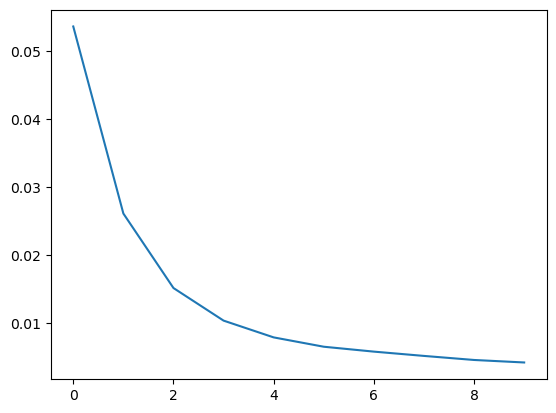

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])